# Overview and analysis of AirBnB listings in Barcelona
In this project, we explore Airbnb listings in Barcelona, a city renowned for its tourism. With millions of annual visitors, Barcelona's popularity as a tourist destination significantly influences its hospitality sector. Airbnb, a major player in this landscape, shapes the city's lodging experience. This analysis focuses on key statistics and trends, aiming to reveal insights into the distribution, pricing dynamics, and trends of Airbnb listings across Barcelona's neighborhoods. Through data exploration, we aim to uncover patterns that provide a deeper understanding of the evolving Airbnb market in this vibrant Mediterranean city.

![Barcelona](https://media.traveler.es/photos/63838947050e0f92cd80c982/16:9/w_2560%2Cc_limit/GettyImages-1392907424.jpg)

## Structure of the notebook
1. Loading and exploring dataset
2. Cleaning dataset
3. Business analysis and visualization
4. Hypothesis testing
5. Data preprocessing
6. Prediction of listing price based on other variables

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Loading dataset
data = pd.read_csv('data/cleaned/listings_cleaned.csv', parse_dates=['host_since', 'first_review'])

# Since we have 75 columns, we want pandas to display all of them
pd.set_option('display.max_columns', None)

# Exploring first 5 rows
data.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,first_review,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,71615,2010-01-19,within an hour,0.97,0.90,f,t,t,Eixample,Entire home/apt,8,2.00,3.00,6.00,202.00,1,1125,t,4,2013-05-27,4.30,t,30,0.30
1,90417,2010-03-09,within an hour,1.00,0.94,t,t,t,Sant Marti,Entire home/apt,5,2.00,3.00,4.00,255.00,3,300,t,16,2011-03-15,4.77,f,2,0.48
2,567180,2011-05-08,within a few hours,0.88,0.98,f,t,f,Eixample,Entire home/apt,8,2.00,3.00,6.00,331.00,2,30,f,0,2011-08-09,4.55,f,19,0.33
3,135703,2010-05-31,within an hour,1.00,1.00,f,t,t,Gracia,Entire home/apt,6,1.50,2.00,3.00,171.00,21,31,t,6,2011-07-17,4.46,t,3,0.64
4,567180,2011-05-08,within a few hours,0.88,0.98,f,t,f,Eixample,Entire home/apt,8,2.50,3.00,5.00,333.00,2,28,f,0,2011-09-13,4.56,f,19,0.34


In [3]:
# Checking the shape of the dataframe

data.shape

(11731, 24)

In [4]:
# Checking dataframe information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11731 entries, 0 to 11730
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         11731 non-null  int64         
 1   host_since                      11731 non-null  datetime64[ns]
 2   host_response_time              11731 non-null  object        
 3   host_response_rate              11731 non-null  float64       
 4   host_acceptance_rate            11731 non-null  float64       
 5   host_is_superhost               11731 non-null  object        
 6   host_has_profile_pic            11731 non-null  object        
 7   host_identity_verified          11731 non-null  object        
 8   neighbourhood_group_cleansed    11731 non-null  object        
 9   room_type                       11731 non-null  object        
 10  accommodates                    11731 non-null  int64         
 11  ba

## 3. Business analysis and visualization

We are going to explore the data with our main goal in mind, which is determining the variables driving the prices of the listings:
- Distribution of our target variable
- Aggregations and filterings to carry out different types of analysis mixing the pricing variable with other categorical variables
- Visualization of relevant numerical and categorical variables
- Correlation analysis

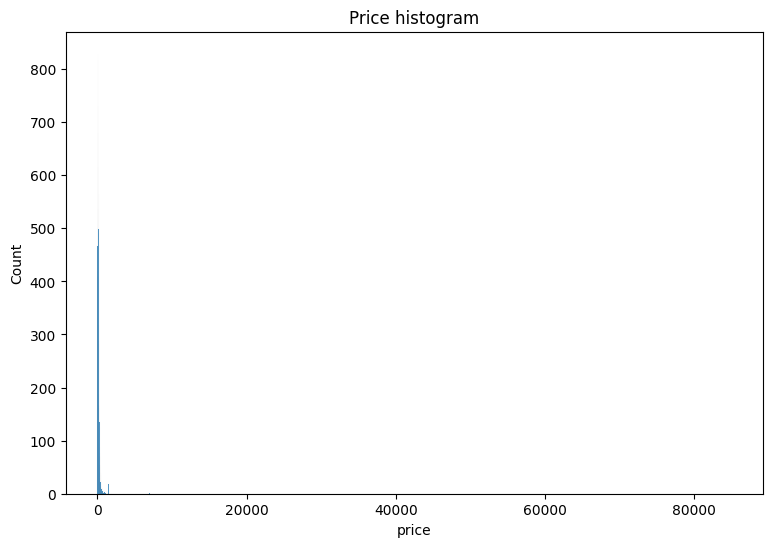

In [5]:
# Exploring the distribution of the price column

plt.subplots(figsize=(9, 6))
sns.histplot(data['price'])
plt.title('Price histogram')
plt.show()

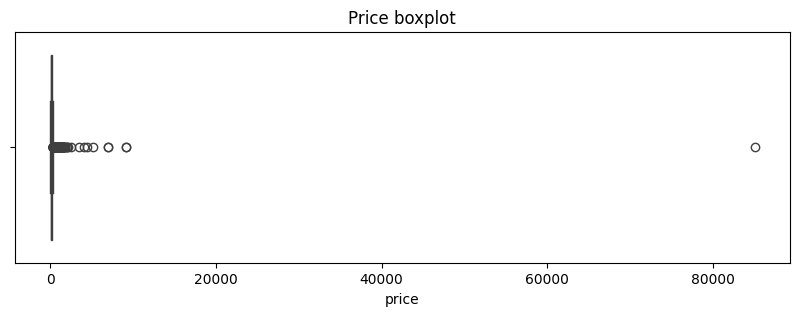

In [6]:
# Something is odd, let's try to identify extreme values with a boxplot

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data['price'])
plt.title('Price boxplot')
plt.show()

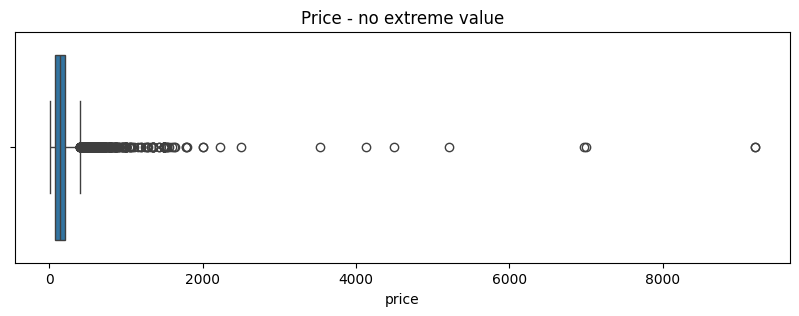

In [7]:
# We can see there is an extreme value, which after further investigation turns out to be an error in a listing that has since been removed, let's check it out again after removing that record

data_filtered = data[data['price'] < 80000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price - no extreme value')
plt.show()

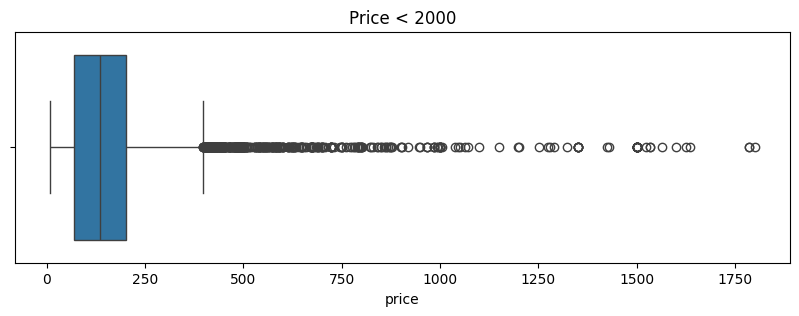

In [8]:
# This looks way better, but we still have some outliers, let's play with the filter to identify a good cutoff for our price

# Filter out records with price higher than 2000
data_filtered = data[data['price'] < 2000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price < 2000')
plt.show()

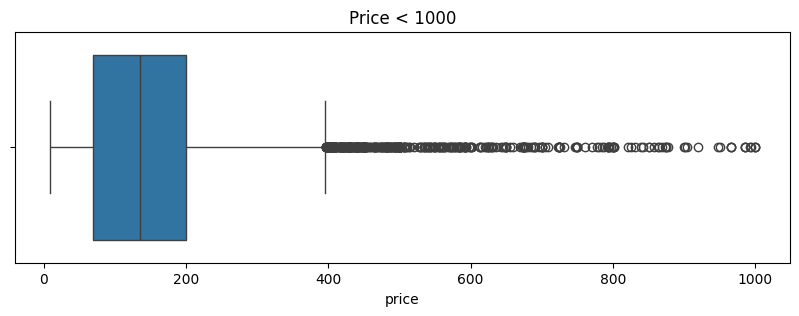

In [9]:
# We can still see some scattered values at the end of the right tail, let's filter out records with price higher than 1000
data_filtered = data[data['price'] < 1000]

plt.subplots(figsize=(10, 3))
sns.boxplot(x=data_filtered['price'])
plt.title('Price < 1000')
plt.show()

In [10]:
# The values are much closer to each other, let's find out how many rows we have lost in the process

rows_removed = data.shape[0] - data_filtered.shape[0]
print(f'Initial number of rows: {data.shape[0]}')
print(f'Final number of rows: {data_filtered.shape[0]}')
print(f'{rows_removed} rows were removed during the filtering')

Initial number of rows: 11731
Final number of rows: 11664
67 rows were removed during the filtering


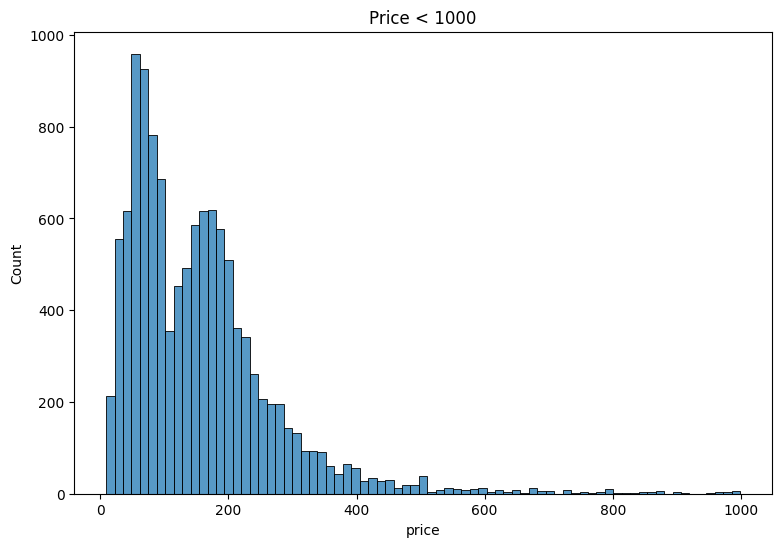

In [11]:
# Let's see the histogram of price now

plt.subplots(figsize=(9, 6))
sns.histplot(data_filtered['price'], bins=75)
plt.title('Price < 1000')
plt.show()

In [12]:
# Resetting index

data_filtered = data_filtered.reset_index(drop=True)

#### Neighbourhood centered analysis

In [13]:
# Overview of price and reviews by neighbourhood

neighbourhood_pivot = round(pd.pivot_table(data_filtered, index='neighbourhood_group_cleansed', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

neighbourhood_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

neighbourhood_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
neighbourhood_group_cleansed,,,,,,,
Ciutat Vella,2544,999.00,133.03,16.00,5.00,4.54,0.00
Eixample,4374,999.00,188.53,10.00,5.00,4.58,0.00
Gracia,1033,992.00,150.84,13.00,5.00,4.54,0.00
Horta-Guinardo,336,600.00,89.94,15.00,5.00,4.51,1.00
Les Corts,224,535.00,139.89,21.00,5.00,4.59,2.50
Nou Barris,107,300.00,60.27,15.00,5.00,4.61,1.00
Sant Andreu,136,263.00,84.59,15.00,5.00,4.55,0.00
Sant Marti,1091,840.00,151.20,9.00,5.00,4.57,0.00
Sants-Montjuic,1268,966.00,122.79,14.00,5.00,4.54,1.00


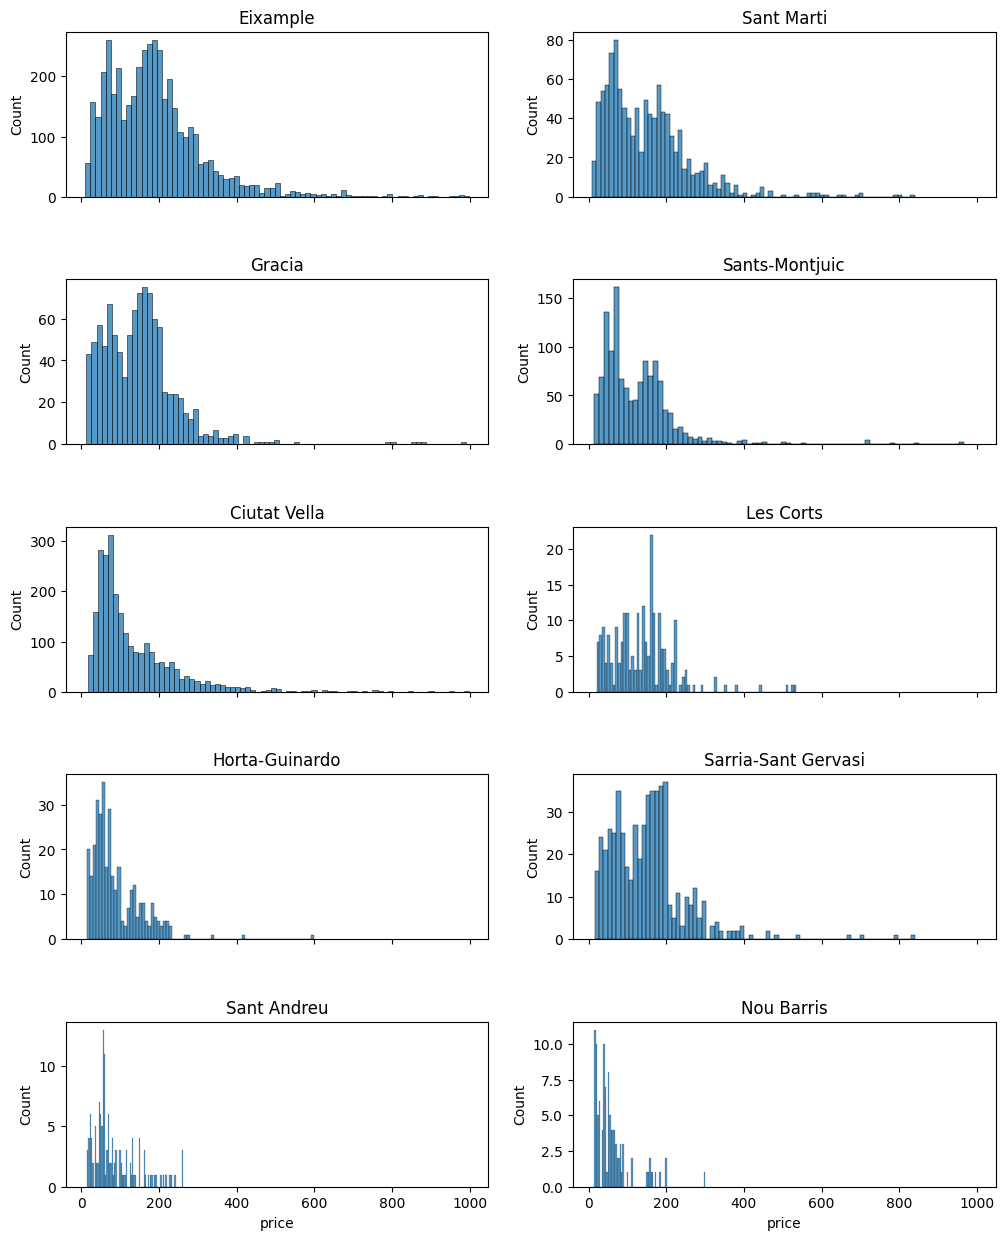

In [14]:
# Histograms of the price by neighbourhood

# Creating list with neighbourhood categories
neighbourhoods = [x for x in data['neighbourhood_group_cleansed'].unique()]

# Defining function to plot histograms
def make_histograms_categories(df, col_filter, col_plot, categories, bins=75, figsize=(12, 15), sharex=False, sharey=False):
    
    '''
    Plot Seaborn histograms in a grid for different categories.
    Inputs:
    - df: DataFrame containing the data
    - col_filter: Column in the DataFrame for which the category filter will be done
    - col_plot: Column in the DataFrame for which histograms will be plotted
    - categories: List of unique values in the column for which histograms will be plotted
    - bins: Number of bins for histograms (default is 75)
    - figsize: size of the figure (default is 12, 25)
    '''
    
    num_categories = len(categories)

    if num_categories == 2:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=sharex, sharey=sharey)
    else:
        num_rows = num_categories // 2
        num_cols = 2 if num_categories % 2 == 0 else 1

        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=sharex, sharey=sharey)
        fig.subplots_adjust(hspace=0.5)

    for i, category in enumerate(categories):
        if num_categories == 2:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i])
            axes[i].set_title(category)
        else:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i // 2, i % 2])
            axes[i // 2, i % 2].set_title(category)

    plt.show()

make_histograms_categories(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='price', categories=neighbourhoods, sharex=True)

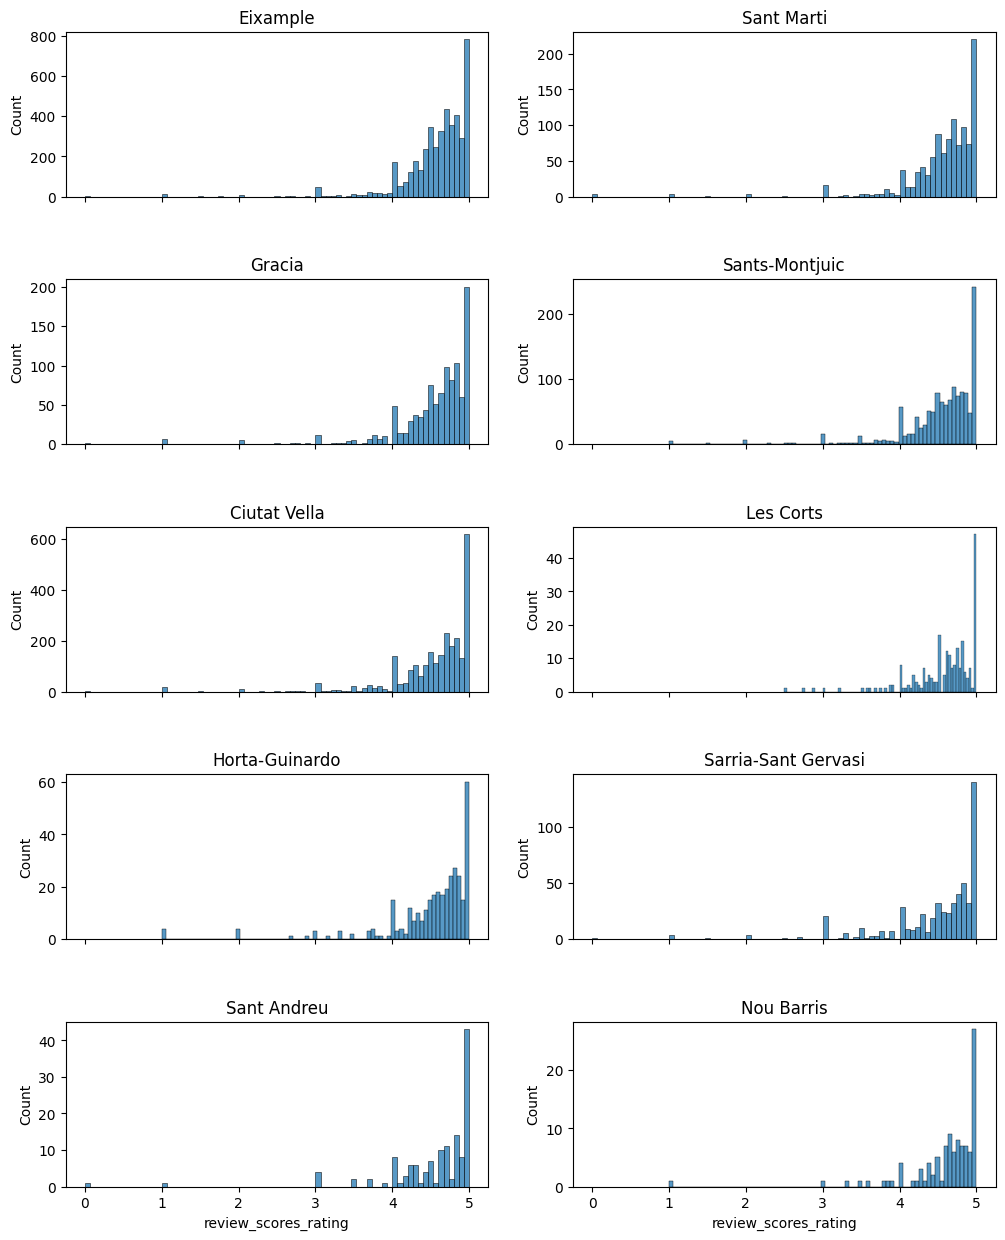

In [15]:
# Histograms of ratings by neighbourhood

make_histograms_categories(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='review_scores_rating', categories=neighbourhoods, sharex=True)

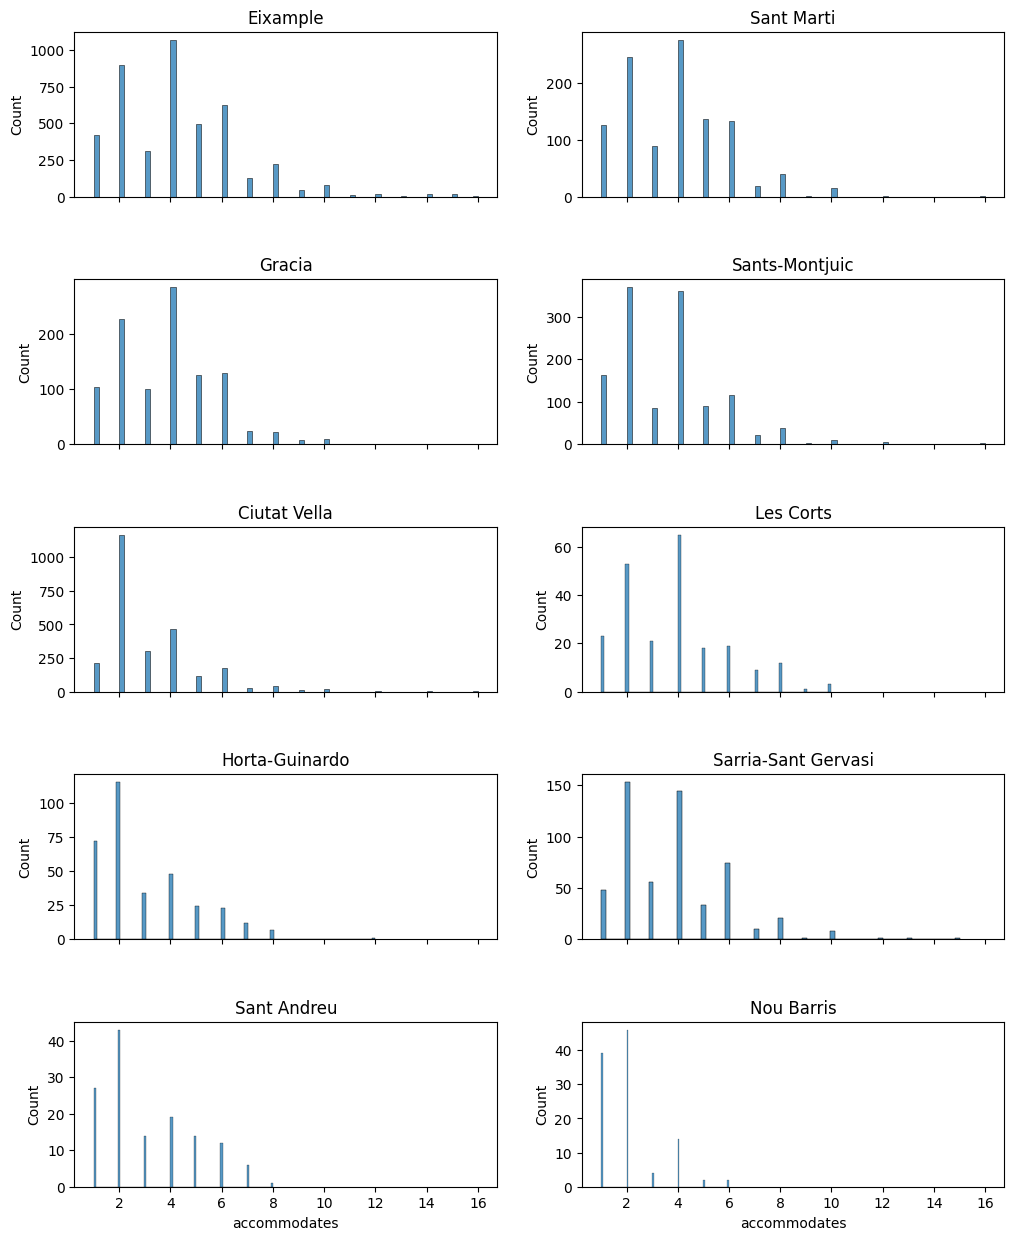

In [16]:
# Histograms of accommodates by neighbourhood

make_histograms_categories(df=data_filtered, col_filter='neighbourhood_group_cleansed', col_plot='accommodates', categories=neighbourhoods, sharex=True)

#### Room type centered analysis

In [17]:
roomtype_pivot = round(pd.pivot_table(data_filtered, index='room_type', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

roomtype_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

roomtype_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
room_type,,,,,,,
Entire home/apt,8095,999.00,183.33,10.00,5.00,4.55,0.00
Hotel room,94,726.00,208.15,22.00,5.00,4.62,1.00
Private room,3370,999.00,85.47,9.00,5.00,4.57,0.00
Shared room,105,985.00,107.83,15.00,5.00,4.51,3.00


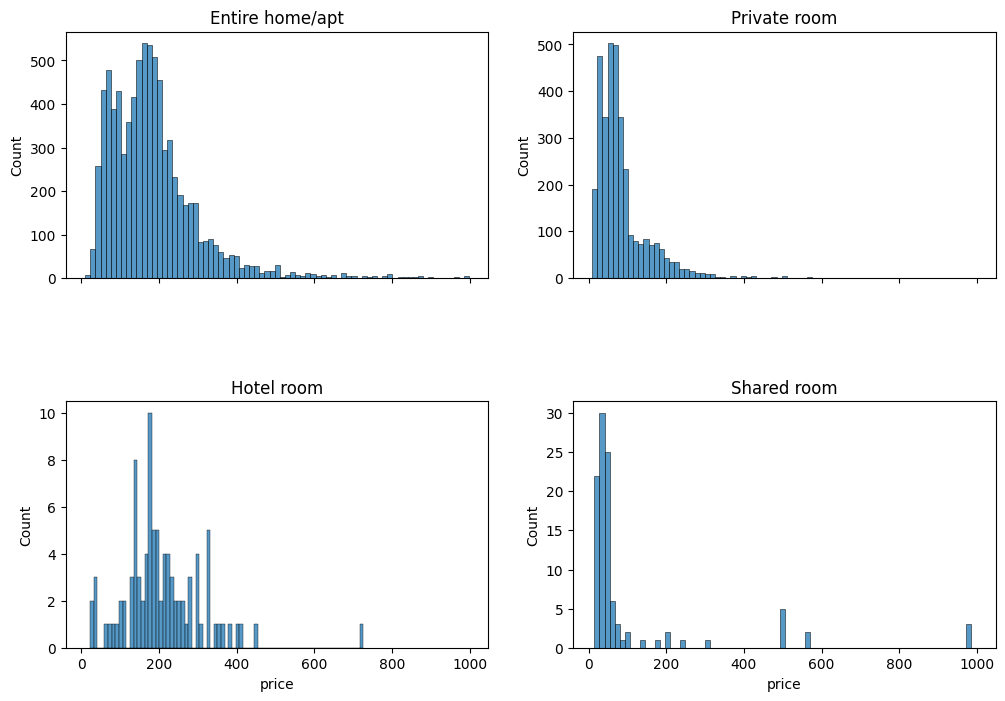

In [18]:
# Histograms of the price by neighbourhood

room_types = [x for x in data_filtered['room_type'].unique()]

make_histograms_categories(df=data_filtered, col_filter='room_type', col_plot='price', categories=room_types, figsize=(12, 8), sharex=True)

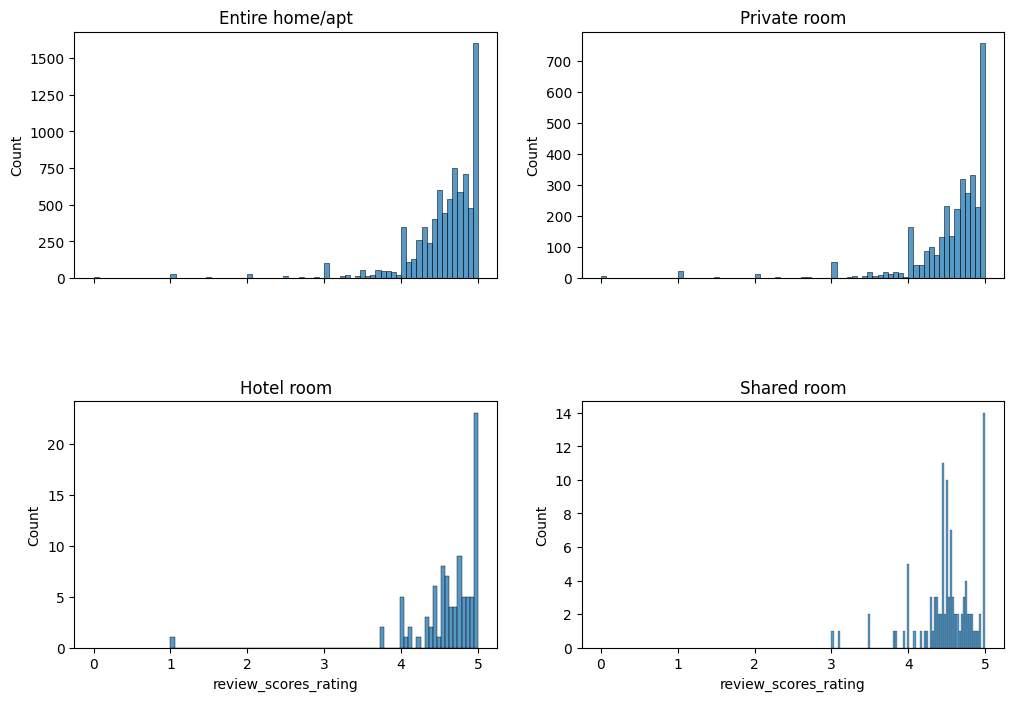

In [19]:
make_histograms_categories(df=data_filtered, col_filter='room_type', col_plot='review_scores_rating', categories=room_types, figsize=(12, 8), sharex=True)

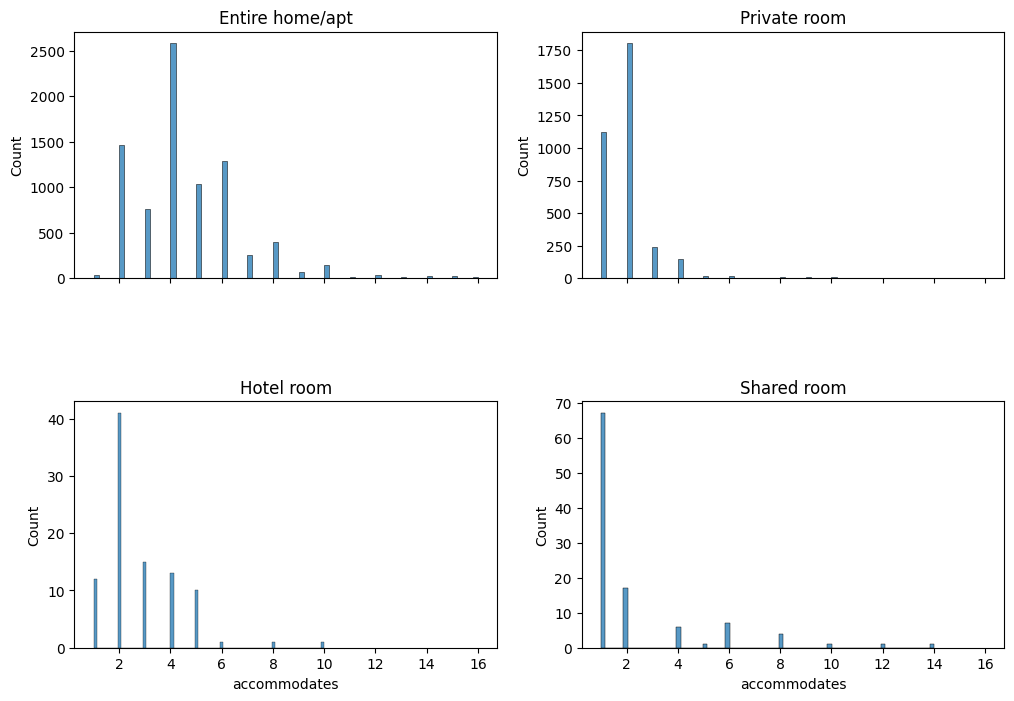

In [20]:
# Histograms of accommodates by room_type

make_histograms_categories(df=data_filtered, col_filter='room_type', col_plot='accommodates', categories=room_types, figsize=(12, 8), sharex=True)

#### Host type centered analysis

In [21]:
superhost_pivot = round(pd.pivot_table(data_filtered, index='host_is_superhost', values=['price', 'review_scores_rating'], aggfunc={'price': ['count', 'min', 'max', 'mean'], 'review_scores_rating': ['min', 'max', 'mean']}), 2)

superhost_pivot.columns = ['count', 'price_max', 'price_mean', 'price_min', 'review_max', 'review_mean', 'review_min']

superhost_pivot

,count,price_max,price_mean,price_min,review_max,review_mean,review_min
host_is_superhost,,,,,,,
f,8835,999.00,151.24,9.00,5.00,4.47,0.00
t,2829,999.00,165.01,13.00,5.00,4.83,1.00


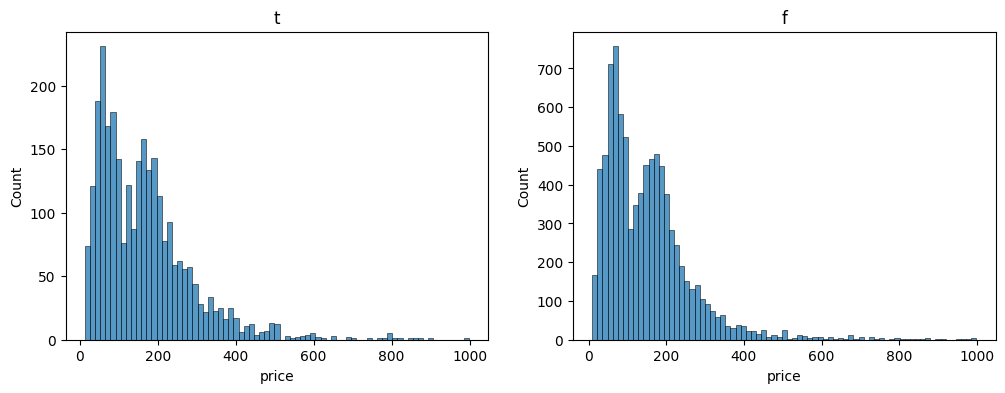

In [22]:
host_types = ['t', 'f']

make_histograms_categories(df=data_filtered, col_filter='host_is_superhost', col_plot='price', categories=host_types, figsize=(12, 4))

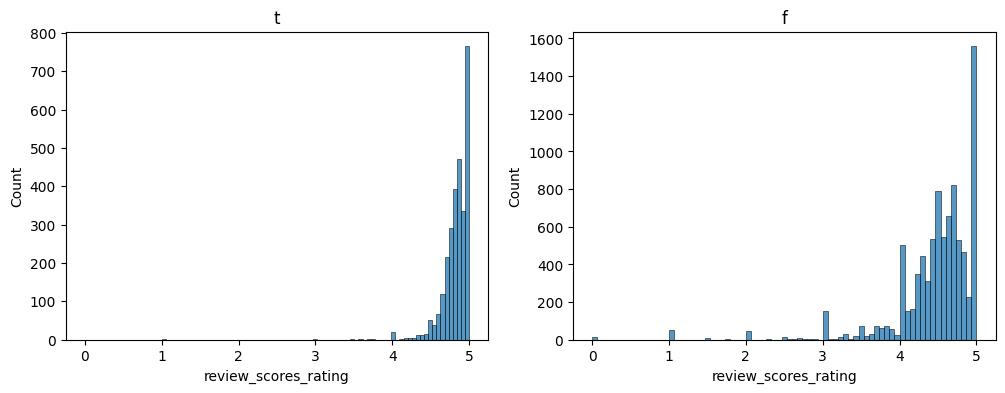

In [23]:
make_histograms_categories(df=data_filtered, col_filter='host_is_superhost', col_plot='review_scores_rating', categories=host_types, figsize=(12, 4), sharex=True)

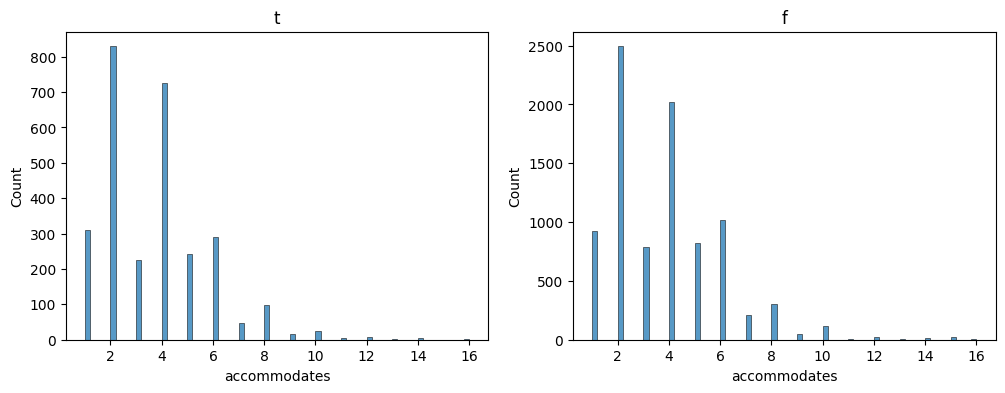

In [24]:
make_histograms_categories(df=data_filtered, col_filter='host_is_superhost', col_plot='accommodates', categories=host_types, figsize=(12, 4))

In [25]:
# Splitting dataframe into numerical and categorical columns

data_num = data_filtered.select_dtypes(include='number')
data_cat = data_filtered.select_dtypes(include='object')

In [26]:
# Defining function to create histograms of all the numerical columns

def make_histograms_cols(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates histograms for all the columns.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(x=df[col], data=df, ax=axes[row_idx, col_idx]) 
        axes[row_idx, col_idx].set_title(col)

    plt.show()

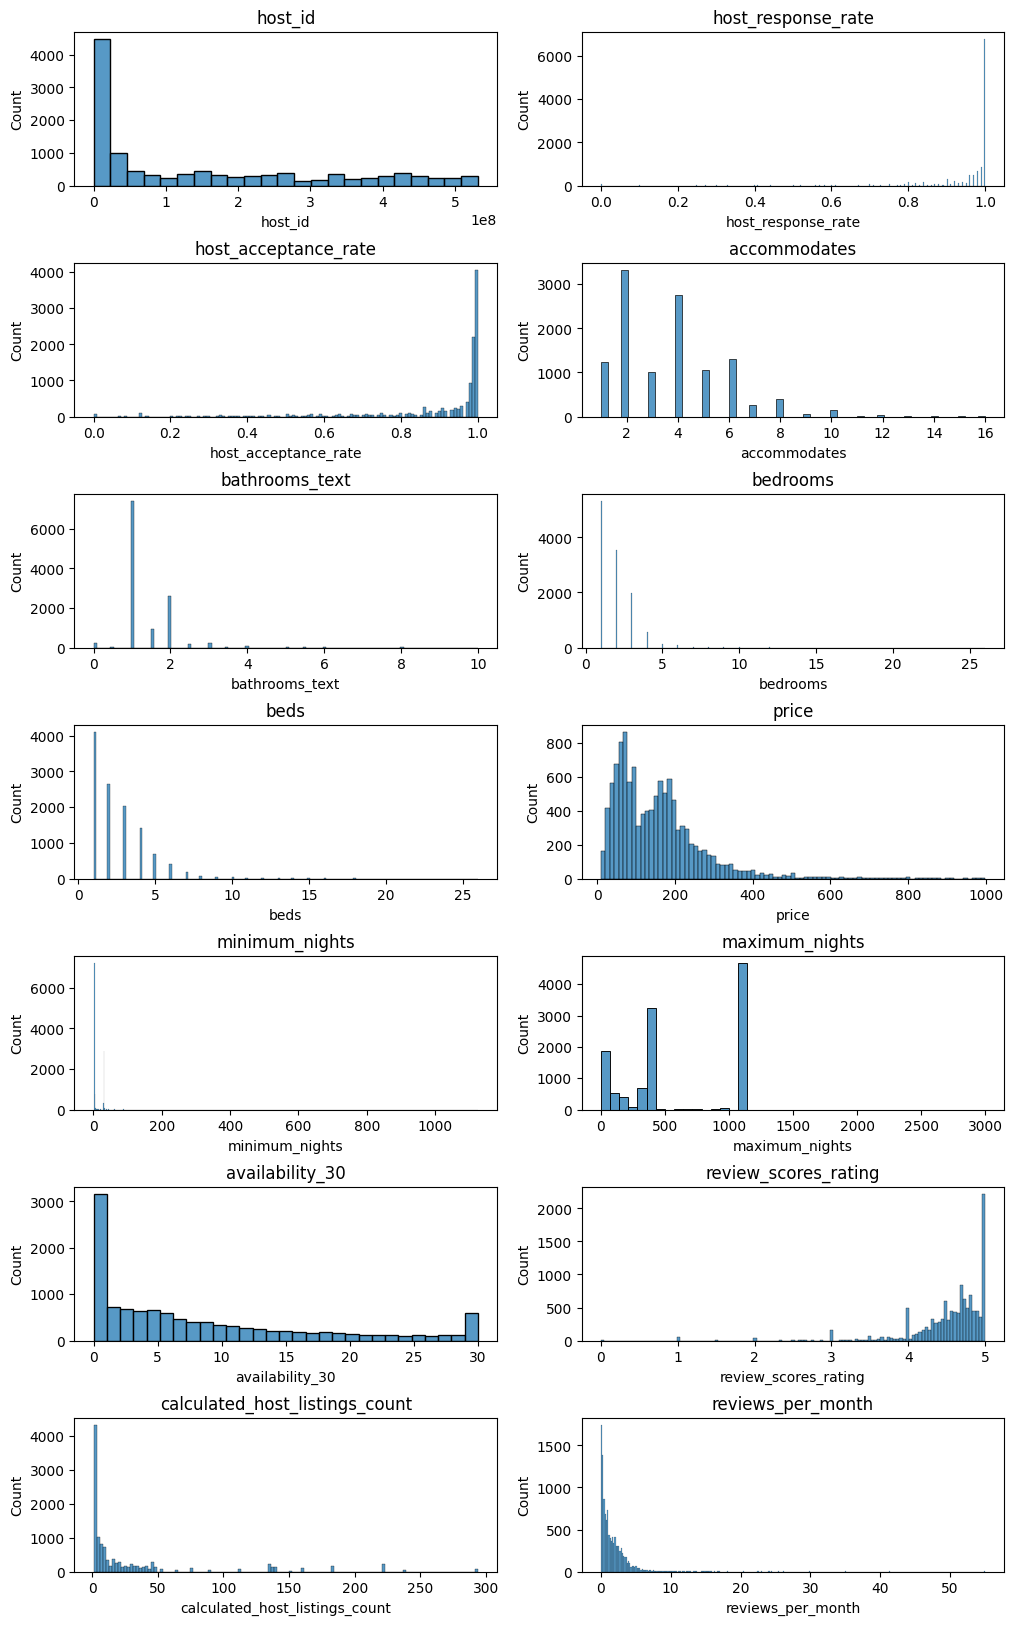

In [27]:
make_histograms_cols(data_num, figsize=(12, 20))

In [28]:
# Calculating skewness of numerical columns

def compute_skewness(df: pd.DataFrame, threshold: int=-1):
    
    '''
    Computes and prints the skewness of the columns in a dataframe.
    Inputs: pandas DataFrame
    '''
    
    print('Skewness of columns in the dataframe:\n')
    
    for col in df.columns:
        if st.skew(df[col]) > abs(threshold) or st.skew(df[col]) < threshold:
            print(f'{col}: {round(st.skew(df[col]), 2)} -> Out of threshold')
        else:
            print(f'{col}: {round(st.skew(df[col]), 2)}')


compute_skewness(data_num)

Skewness of columns in the dataframe:

host_id: 0.82
host_response_rate: -4.74 -> Out of threshold
host_acceptance_rate: -2.95 -> Out of threshold
accommodates: 1.31 -> Out of threshold
bathrooms_text: 2.59 -> Out of threshold
bedrooms: 2.84 -> Out of threshold
beds: 2.23 -> Out of threshold
price: 2.15 -> Out of threshold
minimum_nights: 20.88 -> Out of threshold
maximum_nights: 0.19
availability_30: 1.08 -> Out of threshold
review_scores_rating: -3.35 -> Out of threshold
calculated_host_listings_count: 2.76 -> Out of threshold
reviews_per_month: 5.82 -> Out of threshold


In [29]:
# Main summary statistics of the numerical variables

round(data_num.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
host_id,11664.00,151709475.76,168734089.13,10704.00,6299958.00,63229593.00,270258032.00,531957009.00
host_response_rate,11664.00,0.95,0.12,0.00,0.97,1.00,1.00,1.00
host_acceptance_rate,11664.00,0.91,0.17,0.00,0.91,0.99,1.00,1.00
accommodates,11664.00,3.73,2.19,1.00,2.00,4.00,5.00,16.00
bathrooms_text,11664.00,1.34,0.65,0.00,1.00,1.00,2.00,10.00
bedrooms,11664.00,1.89,1.11,1.00,1.00,2.00,2.00,26.00
beds,11664.00,2.60,1.85,1.00,1.00,2.00,3.00,26.00
price,11664.00,154.58,116.18,9.00,70.00,135.00,200.00,999.00
minimum_nights,11664.00,11.89,23.17,1.00,1.00,3.00,31.00,1125.00
maximum_nights,11664.00,599.52,450.58,1.00,299.75,365.00,1125.00,3000.00


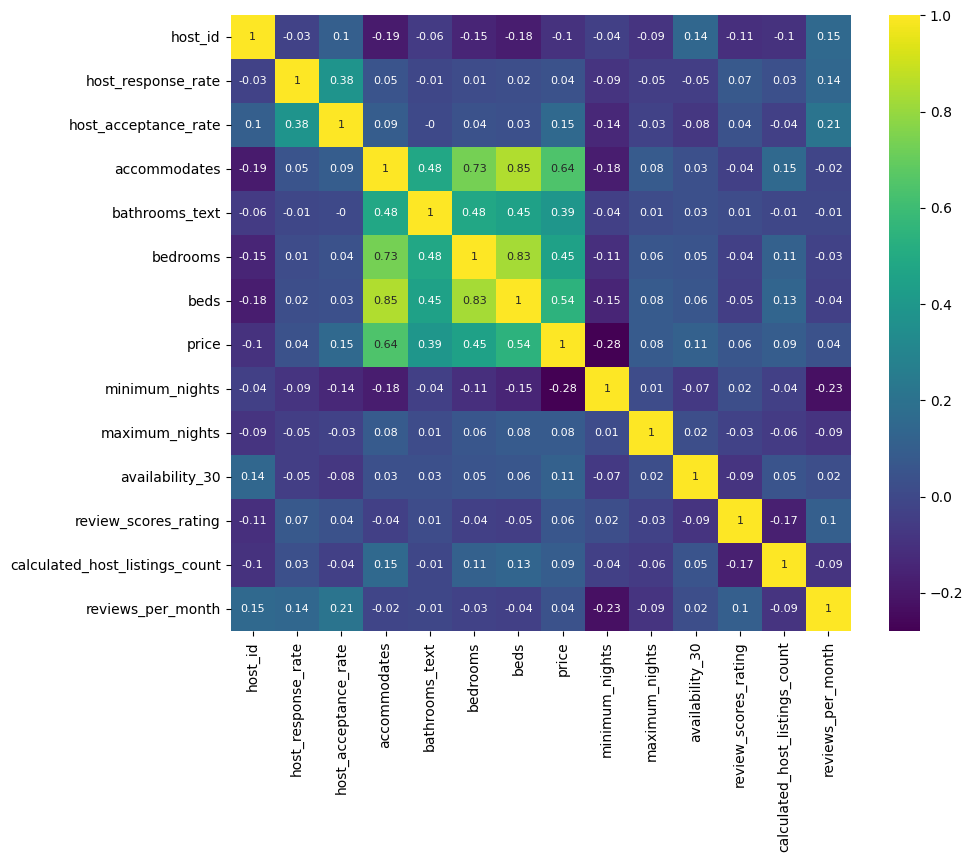

In [30]:
# Correlation matrix

corr_matrix = round(data_num.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={'size': 8})

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Defining a function to compute the vif to identify possible multicolinearity issues

def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [32]:
# Computing multicolinearity between columns

# Columns to consider
data_num_vif = data_num.copy()
selected_columns = list(data_num_vif.columns)
selected_columns.remove('price')

# compute vif
vif_df = compute_vif(data_num_vif, selected_columns)
display(vif_df)

,Variable,VIF
0,beds,5.32
1,accommodates,3.87
2,bedrooms,3.41
3,bathrooms_text,1.40
4,host_acceptance_rate,1.25
5,host_response_rate,1.19
6,reviews_per_month,1.14
7,host_id,1.13
8,minimum_nights,1.11
9,calculated_host_listings_count,1.09


In [33]:
# This time removing the beds column

# Columns to consider
data_num_vif = data_num_vif.drop(columns='beds')
selected_columns = list(data_num_vif.columns)
selected_columns.remove('price')

# compute vif
vif_df = compute_vif(data_num_vif, selected_columns)
display(vif_df)

,Variable,VIF
0,accommodates,2.44
1,bedrooms,2.29
2,bathrooms_text,1.39
3,host_acceptance_rate,1.25
4,host_response_rate,1.19
5,reviews_per_month,1.14
6,host_id,1.13
7,minimum_nights,1.11
8,calculated_host_listings_count,1.09
9,review_scores_rating,1.07


In [34]:
# The conclusion is to drop the beds column, since it appears to be highly correlated to other numerical variables

data_num = data_num.drop(columns='beds')
data_filtered = data_filtered.drop(columns='beds')

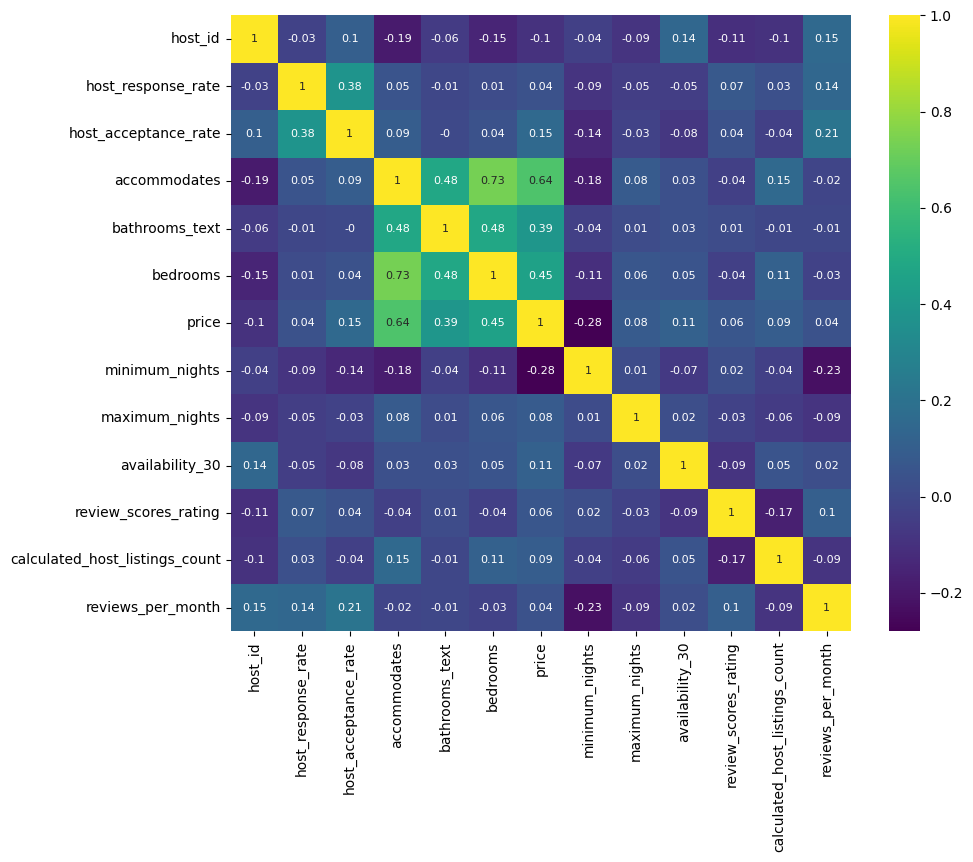

In [35]:
# Plotting the new correlation matrix

corr_matrix = round(data_num.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={'size': 8})

In [36]:
# Main summary statistics of the categorical variables

data_cat.describe().T

,count,unique,top,freq
host_response_time,11664,4,within an hour,8957
host_is_superhost,11664,2,f,8835
host_has_profile_pic,11664,2,t,11540
host_identity_verified,11664,2,t,11383
neighbourhood_group_cleansed,11664,10,Eixample,4374
room_type,11664,4,Entire home/apt,8095
has_availability,11664,2,t,11619
instant_bookable,11664,2,f,6364


In [37]:
# Defining function to plot countplots

def make_countplots(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates countplots for all the columns.
    If the column has more than 5 categories, the data goes in the y axis.
    Bars are arranged in descending order based on count.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if df[col].nunique() > 5:
            order = df[col].value_counts().index
            sns.countplot(y=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)
        else:
            order = df[col].value_counts().index
            sns.countplot(x=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)

        axes[row_idx, col_idx].set_title(col)
        axes[row_idx, col_idx].set_xlabel('Count' if df[col].nunique() <= 5 else 'Frequency')
        axes[row_idx, col_idx].set_ylabel('Categories' if df[col].nunique() > 5 else 'Count')

    plt.show()

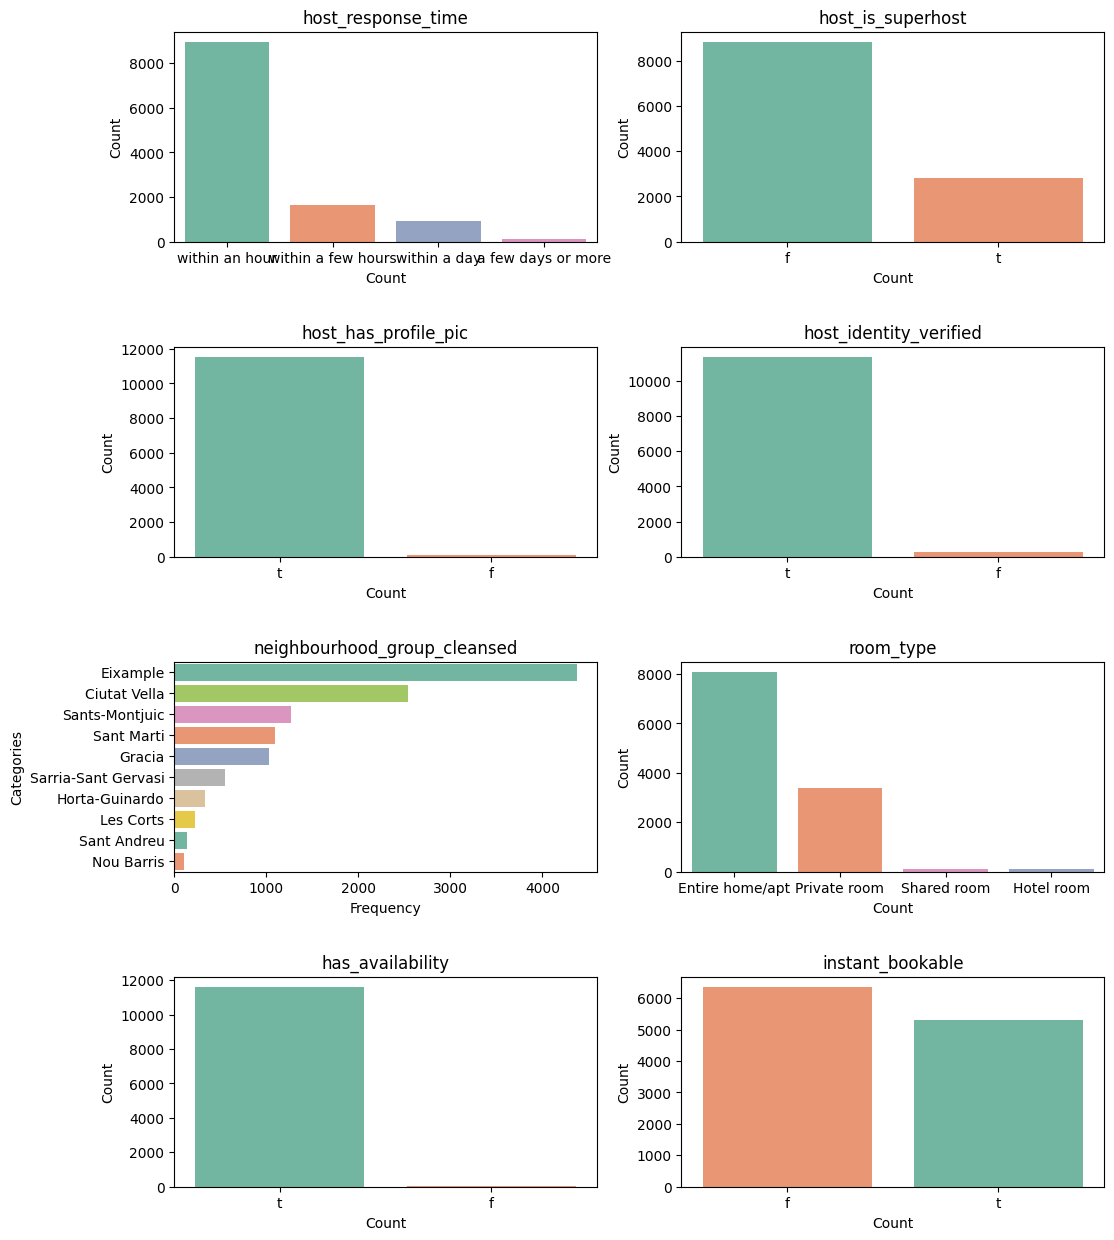

In [38]:
# Creating countplots for the categorical columns

make_countplots(data_cat)

### Some additional analysis to answer business questions and curiosities

In [39]:
# Calculating the average number of listings per host id

data_filtered['host_id'].nunique()

round(len(data_filtered) / data_filtered['host_id'].nunique(), 2)

2.95

In [40]:
# Top 20 hosts by number of listings

data_filtered['host_id'].value_counts().sort_values(ascending=False).head(20)

host_id
32037490     220
4459553      167
299462       139
158023606    126
265193861    111
1391607      107
1447144       92
346367515     81
396363        67
47171261      59
436641358     53
357946540     51
9400556       46
370718107     45
10547296      45
33278356      43
35936647      43
434893527     42
2439400       41
130223809     40
Name: count, dtype: int64

#### How long, on average, takes hosts to receive its first review?

In [41]:
# How long does it take to get a first review

date_diff = data['first_review'] - data['host_since']
mean_date_diff = date_diff.mean().days

mean_date_diff_years = round(mean_date_diff / 365.25, 2)
print(f'On average, it takes {mean_date_diff_years} years for a host to receive his/her first review.')

On average, it takes 3.63 years for a host to receive his/her first review.


#### Analysis of extreme pricing related to availability

In [42]:
# Creating dataframes for listings priced higher and lower a certain threshold

data_highest_prices = data[(data['price'] >= 1000) & (data['price'] < 80000)]
data_other = data[(data['price'] < 1000)]

# Calculating mean 30-day availability for the previous dataframes

print(data_highest_prices['availability_30'].mean())
print(data_other['availability_30'].mean())

15.363636363636363
8.40886488340192


In [43]:
# Creating dataframes for listings priced higher and lower a certain threshold

data_highest_prices = data[(data['price'] >= 500) & (data['price'] < 80000)]
data_other = data[(data['price'] < 500)]

# Calculating mean 30-day availability for the previous dataframes

print(data_highest_prices['availability_30'].mean())
print(data_other['availability_30'].mean())

12.84115523465704
8.341744521086179


#### Location of the listings removed in the outlier treatment process

In [44]:
# We are mostly going to consider data_filtered for our analysis, since this way we get rid of extreme values that can distort our statistics, correlation metrics and future predictions, but let's see where most of the higher priced listings were placed

data[data['price'] >= 1000].groupby('neighbourhood_group_cleansed').size().sort_values(ascending=False)

neighbourhood_group_cleansed
Eixample               22
Ciutat Vella           11
Sant Marti             10
Gracia                  9
Sarria-Sant Gervasi     8
Sants-Montjuic          4
Horta-Guinardo          2
Nou Barris              1
dtype: int64

#### Visualizing if the type of host (superhost or not) has significance in terms or price and reviews 

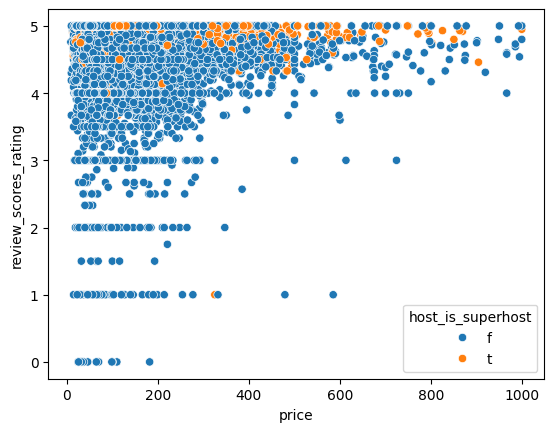

In [45]:
# Scatterplot of price v review by host type

sns.scatterplot(data=data_filtered, x='price', y='review_scores_rating', hue='host_is_superhost')
plt.show()

#### Scatterplot of price and accommodates to try visualizing the linear correlation

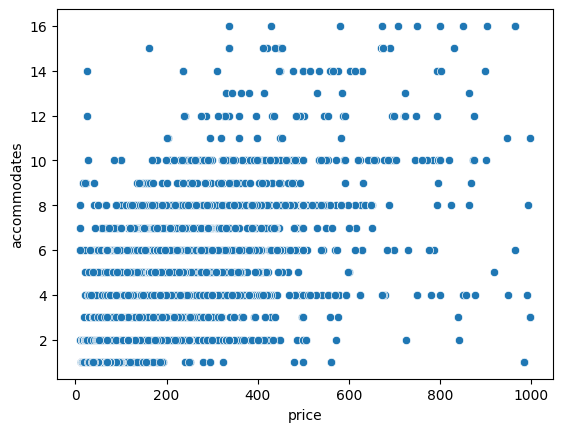

In [46]:
# Scatterplot of price v accommodates

sns.scatterplot(data=data_filtered, x='price', y='accommodates')
plt.show()

## 4. Hypothesis testing

#### We can see Eixample has the most listings out of all the neighbourhoods, can we determine if the mean pricing of Eixample is representative of the whole dataset with a 95% significance level

In [47]:
# H0: Eixample mean price = population mean price
# Ha: Eixample mean price != population mean price

pop_mean = data_filtered['price'].mean()
eix_price = data_filtered[data_filtered['neighbourhood_group_cleansed'] == 'Eixample']['price']
eix_mean = eix_price.mean()

print(pop_mean)
print(eix_mean)

154.5787037037037
188.53360768175583


In [48]:
# Using scipy t-test

alpha = 0.05
stat, pval = st.ttest_1samp(eix_price, popmean=pop_mean, alternative='two-sided')
print('t-statistic: {:.3f}'.format(stat))
print('p-value: {:.3f}'.format(pval))

if pval > (alpha / 2):
    print('Accept null hypothesis: The mean price of Eixample is representative of the population mean.')
else:
    print('Reject null hypothesis: The mean price of Eixample is not representative of the population mean.')

t-statistic: 17.666
p-value: 0.000
Reject null hypothesis: The mean price of Eixample is not representative of the population mean.


In [49]:
# Manual calculation using the statistic method

stat = (eix_mean - pop_mean) / (np.std(eix_price, ddof=1) / np.sqrt(len(eix_price)))
print('The value of the statistic is: {:.3f}'.format(stat))

lower_critical_value, upper_critical_value = st.t.ppf((0.05/2), df=len(eix_price)-1), st.t.ppf(1-(0.05/2), df=len(eix_price)-1)
print("The lower critical value is {:.3f}".format(lower_critical_value))
print("The upper critical value is {:.3f}".format(upper_critical_value))

if stat < lower_critical_value or stat > upper_critical_value:
    print('The statistic doesnt fall within the critical value boundaries, therefore we reject the null hypothesis.')
else:
    print('The statistic falls within the critical value boundaries, therefore we accept the null hypothesis.')

The value of the statistic is: 17.666
The lower critical value is -1.961
The upper critical value is 1.961
The statistic doesnt fall within the critical value boundaries, therefore we reject the null hypothesis.


In [50]:
# We can see that both methods yield the same result

#### During the analysis, the team was wondering if there was a relationship between the neighnourhood and the room type of the listings, we ran a chi2 test to find out.

In [51]:
# H0: Neighbourhood and room type are not related
# Ha: Neighbourhood and room type are related

In [52]:
# Getting a crosstab of our data

crosstab = pd.crosstab(data['neighbourhood_group_cleansed'], data['room_type'])
crosstab

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Ciutat Vella,1596,22,935,2
Eixample,3245,50,1043,58
Gracia,795,10,221,16
Horta-Guinardo,177,0,161,0
Les Corts,177,0,44,3
Nou Barris,32,0,76,0
Sant Andreu,79,0,56,1
Sant Marti,783,1,305,12
Sants-Montjuic,848,10,404,10


In [53]:
# Calculating degrees of freedom

degrees_of_freedom = (crosstab.shape[0] - 1) * (crosstab.shape[1] - 1)
print(f'Degrees of freedom: {degrees_of_freedom}')

critical_value = st.chi2.ppf(1-alpha, df=degrees_of_freedom)
print("The critical value that corresponds to an alpha of 0.05 is: {:.3f}".format(critical_value))

Degrees of freedom: 27
The critical value that corresponds to an alpha of 0.05 is: 40.113


In [54]:
# Using chi2 test from Scipy

chi2, pval, dof, expected_freq_array = st.chi2_contingency(crosstab)
print('chi2: {:.3f}'.format(chi2))
print('p-value: {:.3f}'.format(pval))
print(f'dof: {dof}')

chi2: 388.248
p-value: 0.000
dof: 27


In [55]:
# Test conclusions

if chi2 > critical_value:
    print('chi2 statistic is higher than the critical value, therefore we reject H0 -> neighbourhood and room type are related')
else:
    print('chi2 statistic is higher than the critical value, therefore we accept H0 -> neighbourhood and room type are not related')

chi2 statistic is higher than the critical value, therefore we reject H0 -> neighbourhood and room type are related


## 5. Data preprocessing

In [56]:
# Selecting variables to include in the model, based on correlation with the target variable and domain knowledge

data_selected_cols = data_filtered[['host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'price', 'minimum_nights', 'review_scores_rating', 'availability_30', 'reviews_per_month']]

data_selected_cols

,host_is_superhost,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,price,minimum_nights,review_scores_rating,availability_30,reviews_per_month
0,f,Eixample,Entire home/apt,8,2.00,3.00,202.00,1,4.30,4,0.30
1,t,Sant Marti,Entire home/apt,5,2.00,3.00,255.00,3,4.77,16,0.48
2,f,Eixample,Entire home/apt,8,2.00,3.00,331.00,2,4.55,0,0.33
3,f,Gracia,Entire home/apt,6,1.50,2.00,171.00,21,4.46,6,0.64
4,f,Eixample,Entire home/apt,8,2.50,3.00,333.00,2,4.56,0,0.34
...,...,...,...,...,...,...,...,...,...,...,...
11659,t,Eixample,Private room,2,1.00,1.00,105.00,1,5.00,10,2.00
11660,t,Eixample,Private room,2,1.00,1.00,116.00,1,4.50,2,2.00
11661,f,Sants-Montjuic,Private room,2,1.00,1.00,52.00,1,5.00,23,1.00
11662,t,Ciutat Vella,Private room,2,1.00,1.00,116.00,1,5.00,25,1.00


In [57]:
# Dividing data into X and y

y = data_selected_cols['price']
X = data_selected_cols.drop(columns='price')

In [58]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Looking at shapes after the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9331, 10)
(2333, 10)
(9331,)
(2333,)


In [59]:
# Splitting X_train and y_train into numerical and categorical dataframes

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='object')

X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(include='object')

Let's start with the numerical columns

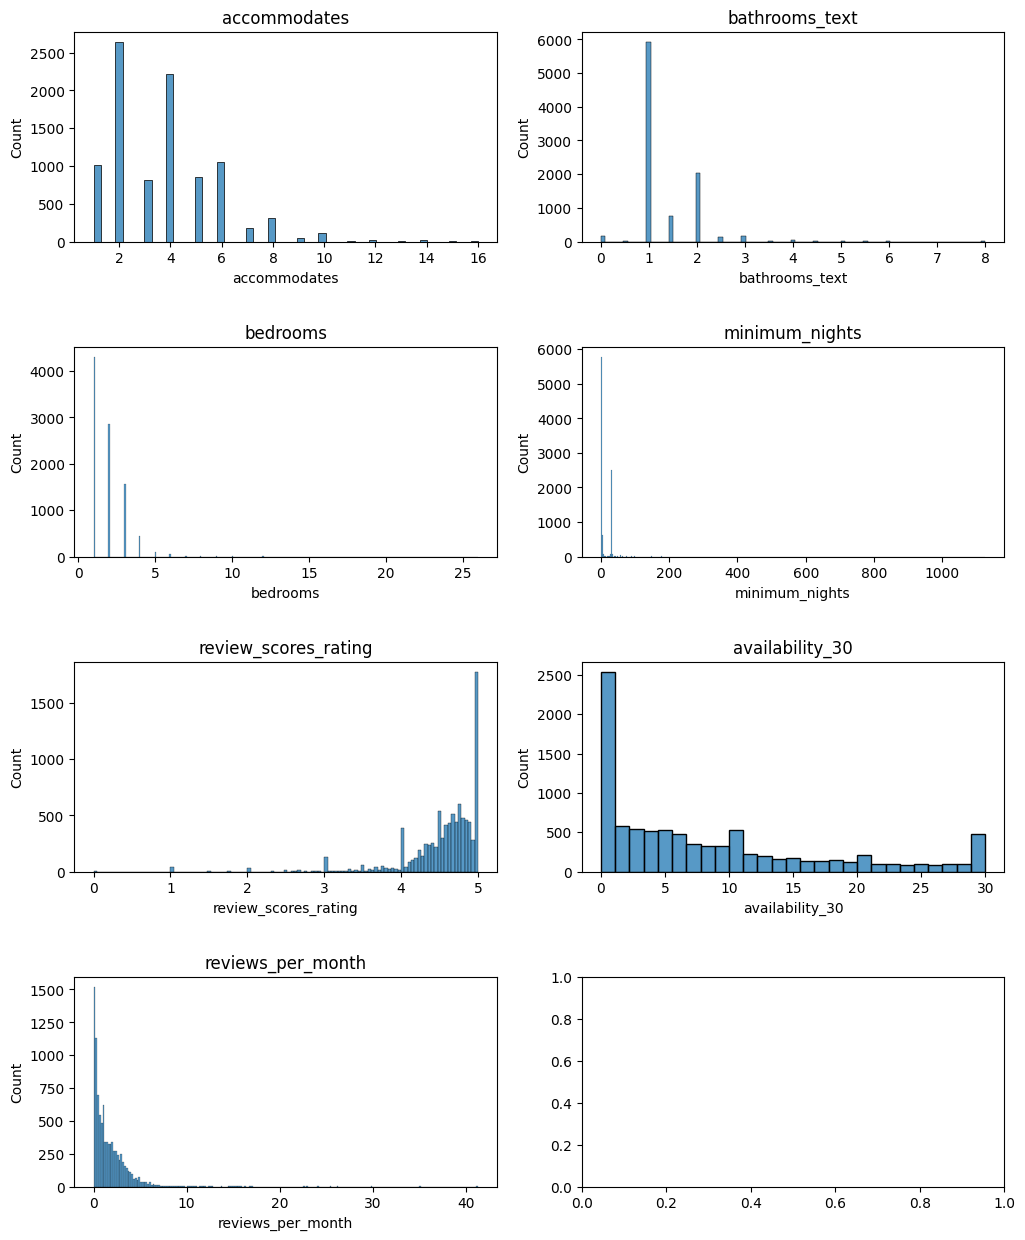

In [60]:
# Having a look at the distributions of the numerical variables

make_histograms_cols(X_train_num)

In [61]:
# Computing skewness of the numerical features to find out how asymmetrical they are

compute_skewness(X_train_num)

Skewness of columns in the dataframe:

accommodates: 1.3 -> Out of threshold
bathrooms_text: 2.48 -> Out of threshold
bedrooms: 3.05 -> Out of threshold
minimum_nights: 21.98 -> Out of threshold
review_scores_rating: -3.31 -> Out of threshold
availability_30: 1.08 -> Out of threshold
reviews_per_month: 4.66 -> Out of threshold


In [62]:
# Applying a power transformer to all the features, none of them are highly symmetrical

from sklearn.preprocessing import PowerTransformer

# List with the name of the columns to transform
cols_to_transform = ['bathrooms_text']

# Creating transformer instance
pt_x = PowerTransformer()

# Fit and transform the train set
trainnum_trans = pt_x.fit_transform(X_train_num)
X_train_num_trans = pd.DataFrame(trainnum_trans, columns=X_train_num.columns, index=X_train_num.index)

# Transform the test set
testnum_trans = pt_x.transform(X_test_num)
X_test_num_trans = pd.DataFrame(testnum_trans, columns=X_test_num.columns, index=X_test_num.index)

In [63]:
# Transforming y as well - this will mean we will have to apply an inverse transformation after predicting values

pt_y = PowerTransformer()

y_train = np.array(y_train).reshape(-1, 1)

y_train_trans = pt_y.fit_transform(y_train)

print(f'Original skewness: {st.skew(y_train)}')
print(f'Skewness after applying transformer: {st.skew(y_train_trans)}')

Original skewness: [2.13180742]
Skewness after applying transformer: [-0.0113531]


In [64]:
import os
import pickle

# Saving transformers

path = "transformers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "power_transformer_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(pt_x, file)

filename = "power_transformer_y.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(pt_y, file)

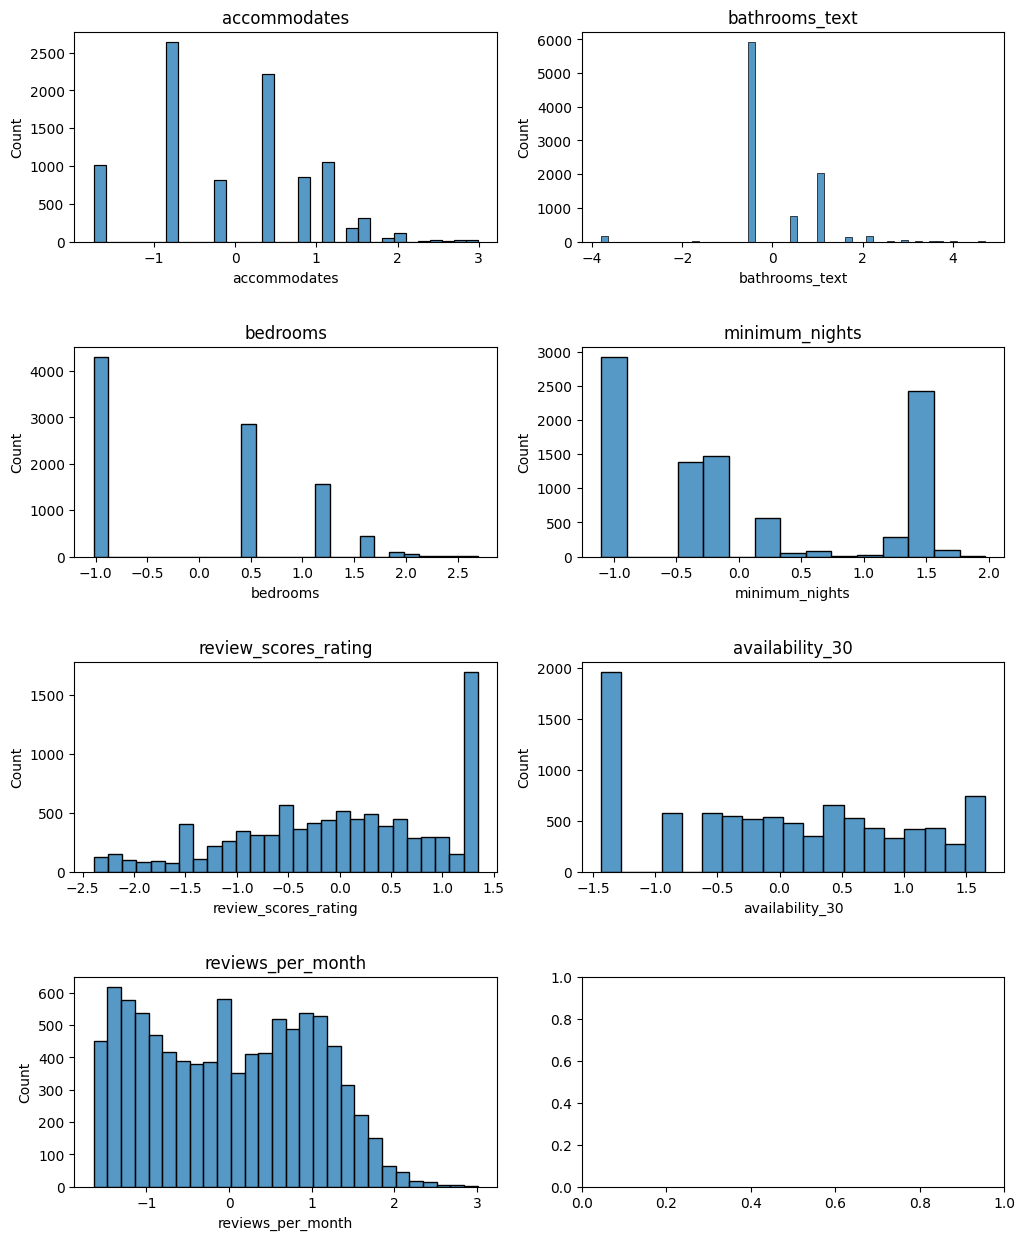

In [65]:
# Histograms after transformation

make_histograms_cols(X_train_num_trans)

In [66]:
# Skewness after transforming

compute_skewness(X_train_num_trans)

Skewness of columns in the dataframe:

accommodates: 0.01
bathrooms_text: -0.08
bedrooms: 0.2
minimum_nights: 0.35
review_scores_rating: -0.35
availability_30: -0.06
reviews_per_month: 0.1


Now onto the categoricals

In [67]:
X_train_cat

,host_is_superhost,neighbourhood_group_cleansed,room_type
9406,f,Gracia,Entire home/apt
6673,f,Eixample,Private room
10685,t,Eixample,Private room
6112,f,Ciutat Vella,Entire home/apt
1680,f,Ciutat Vella,Entire home/apt
...,...,...,...
8631,f,Sants-Montjuic,Private room
9818,f,Sant Marti,Entire home/apt
10859,t,Sant Marti,Private room
4041,f,Sant Marti,Entire home/apt


In [68]:
# Defining function to calculate the conversion rate for an ordinal category based on a statistical metric of a numerical feature

def ordinal_cat_conversion_dict(df: pd.DataFrame, col_convert: str, col_value: str) -> dict:
    '''
    Creates a mapping dictionary to convert an ordinal category based on the values of a numerical feature.
    Inputs:
    - df: pandas DataFrame
    - col_convert: categorical value to convert
    - col_value: numerical column which serves as a basis for the conversion
    Outputs:
    - mapping dictionary
    '''
    grouped = df.groupby(col_convert)[col_value].median().sort_values(ascending=False)
    grouped_df = pd.DataFrame(grouped)
    grouped_df['proportion'] = grouped_df[col_value] / grouped_df[col_value].min()
    conv_list = list(grouped_df.index)
    value_list = list(grouped_df['proportion'])
    mapping_dict = dict(zip(conv_list, value_list))
    
    return mapping_dict

In [69]:
# Calculating neighbourhood category conversion based on average price of listings

mapping_neighbourhoods = ordinal_cat_conversion_dict(data_filtered, 'neighbourhood_group_cleansed', 'price')
mapping_neighbourhoods

{'Eixample': 3.6808510638297873,
 'Sarria-Sant Gervasi': 3.148936170212766,
 'Gracia': 3.106382978723404,
 'Les Corts': 2.9361702127659575,
 'Sant Marti': 2.765957446808511,
 'Sants-Montjuic': 2.148936170212766,
 'Ciutat Vella': 1.9787234042553192,
 'Horta-Guinardo': 1.4893617021276595,
 'Sant Andreu': 1.2765957446808511,
 'Nou Barris': 1.0}

In [70]:
# Encoding neighbourhood in X_train and X_test based on the previous conversion

X_train_cat['neighbourhood_group_cleansed'] = X_train_cat['neighbourhood_group_cleansed'].replace(mapping_neighbourhoods)
X_test_cat['neighbourhood_group_cleansed'] = X_test_cat['neighbourhood_group_cleansed'].replace(mapping_neighbourhoods)

print(X_train_cat['neighbourhood_group_cleansed'].unique())
print(X_test_cat['neighbourhood_group_cleansed'].unique())

[3.10638298 3.68085106 1.9787234  1.4893617  2.93617021 2.76595745
 2.14893617 1.         3.14893617 1.27659574]
[3.68085106 1.4893617  2.76595745 3.14893617 1.9787234  2.93617021
 2.14893617 3.10638298 1.27659574 1.        ]


In [71]:
# Calculating room_type category conversion based on average price of listings

mapping_roomtype = ordinal_cat_conversion_dict(data_filtered, 'room_type', 'price')
mapping_roomtype

{'Hotel room': 4.536585365853658,
 'Entire home/apt': 4.048780487804878,
 'Private room': 1.6097560975609757,
 'Shared room': 1.0}

In [72]:
# Encoding room type in X_train and X_test based on the previous conversion

X_train_cat['room_type'] = X_train_cat['room_type'].replace(mapping_roomtype)
X_test_cat['room_type'] = X_test_cat['room_type'].replace(mapping_roomtype)

print(X_train_cat['room_type'].unique())
print(X_test_cat['room_type'].unique())

[4.04878049 1.6097561  1.         4.53658537]
[4.04878049 1.6097561  1.         4.53658537]


In [73]:
# Replacing values in superhost column to make it binary

X_train_cat['host_is_superhost'] = X_train_cat['host_is_superhost'].replace({'t': 1, 'f': 0})
X_test_cat['host_is_superhost'] = X_test_cat['host_is_superhost'].replace({'t': 1, 'f': 0})

print(X_train_cat['host_is_superhost'].unique())
print(X_test_cat['host_is_superhost'].unique())

[0 1]
[0 1]


In [74]:
# Concatenating the transformed numerical dataframes with the categorical ones

X_train_merged = pd.concat([X_train_num_trans, X_train_cat], axis=1)
X_test_merged = pd.concat([X_test_num_trans, X_test_cat], axis=1)

print(X_train_merged.shape)
print(X_test_merged.shape)

(9331, 10)
(2333, 10)


In [75]:
# Scaling the features with standardscaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_new = scaler.fit_transform(X_train_merged)
X_train_new = pd.DataFrame(X_train_new, columns=X_train_merged.columns, index=X_train_merged.index)

X_test_new = scaler.transform(X_test_merged)
X_test_new = pd.DataFrame(X_test_new, columns=X_test_merged.columns, index=X_test_merged.index)

X_train_new.head()

,accommodates,bathrooms_text,bedrooms,minimum_nights,review_scores_rating,availability_30,reviews_per_month,host_is_superhost,neighbourhood_group_cleansed,room_type
9406,0.77,-0.49,0.51,-1.10,-2.34,0.88,-1.18,-0.57,0.33,0.65
6673,-1.74,0.44,-1.02,1.36,-0.43,1.58,0.09,-0.57,1.07,-1.51
10685,-0.79,-0.49,-1.02,-0.48,0.02,0.66,1.93,1.75,1.07,-1.51
6112,-0.79,-0.49,0.51,-0.12,-2.23,-1.44,-1.20,-0.57,-1.12,0.65
1680,0.77,-0.49,0.51,-1.10,-1.48,1.65,-1.56,-0.57,-1.12,0.65


In [76]:
# Saving scaler

path = "scalers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "standardscaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

## 6. Predicting the price of listings

In [77]:
# Defining function to train several models with default values

def regression_model_trainer(models: list, X_train, y_train) -> list:
    '''
    - Takes a list of models, X_train and y_train sets
    - Fits the models according to the data
    - Outputs a list with the trained models
    '''
    
    trained_models = []
    
    for model in models:
        if model == MLPRegressor():
            model.fit(X_train, y_train, random_state=13)
            trained_models.append(model)
        else:
            model.fit(X_train, y_train)
            trained_models.append(model)
    return trained_models

In [78]:
# Defining a function that creates a dataframe with the error metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def error_metrics_df(y_test, y_test_pred, y_train, y_train_pred) -> pd.DataFrame:
    '''
    - Takes y_test values y_test predicted values, y_train values, y_train predicted values
    - Calculates error metrics (MAE, MSE, RMSE, MAPE, R2)
    - Outputs a dataframe with values for each metric and for each set
    '''
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2score = r2_score(y_test, y_test_pred)
    test_metrics = [test_mae, test_mse, test_rmse, test_mape, test_r2score]
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2score = r2_score(y_train, y_train_pred)
    train_metrics = [train_mae, train_mse, train_rmse, train_mape, train_r2score]
    
    df = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
    df['test_value'] = test_metrics
    df['train_value'] = train_metrics
    
    return df

In [79]:
# Training different regression models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

trained_models = regression_model_trainer(models, X_train_new, y_train_trans)
trained_models

C:\Users\Juan\Documents\Ironhack\Week_5\Mid_bootcamp_project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

In [80]:
# Evaluating model performances

metrics_dfs = []

for model in trained_models:
    y_train_pred_trans = model.predict(X_train_new)
    y_train_pred = pt_y.inverse_transform(y_train_pred_trans.reshape(-1, 1))
    y_test_pred_trans = model.predict(X_test_new)
    y_test_pred = pt_y.inverse_transform(y_test_pred_trans.reshape(-1, 1))
    print(f'Error metrics for {model}:')
    display(error_metrics_df(y_test, y_test_pred, y_train, y_train_pred))
    print('\n')

Error metrics for LinearRegression():


,test_value,train_value
MAE,50.27,47.99
MSE,7192.55,6318.88
RMSE,84.81,79.49
MAPE,0.39,0.36
R2,0.51,0.52




Error metrics for KNeighborsRegressor():


,test_value,train_value
MAE,46.03,35.34
MSE,6249.56,3819.08
RMSE,79.05,61.80
MAPE,0.36,0.26
R2,0.58,0.71




Error metrics for MLPRegressor():


,test_value,train_value
MAE,44.53,38.67
MSE,5925.60,4444.84
RMSE,76.98,66.67
MAPE,0.34,0.28
R2,0.60,0.66


From the results above, we can see that the linear regression has the worst performance overall. The KNRegressor looks promising but looks like it is suffering from some overfitting and the MLPRegressor looks promising but will need some fine tuning:
- Let's optimize the hyperparameters of the KNN Regressor to explore the overfitting issue further
- Let's deep dive into the MLPRegressor to try and find the best possible model

In [81]:
# Let's explore the KNN option with a grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# Creating model
knn = KNeighborsRegressor()

# Using GridSearchCV to perform grid search
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_new, y_train_trans)

# Printing the best parameters and corresponding mean cross-validated score
print('Best Parameters: ', grid_search.best_params_)
print('Best MSE: ', -grid_search.best_score_)

Best Parameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best MSE:  0.2861747406588794


In [82]:
# Predicting values for train and test set and getting error metrics

best_model = grid_search.best_estimator_

y_train_pred_trans = best_model.predict(X_train_new)
y_train_pred = pt_y.inverse_transform(y_train_pred_trans.reshape(-1, 1))
y_test_pred_trans = best_model.predict(X_test_new)
y_test_pred = pt_y.inverse_transform(y_test_pred_trans.reshape(-1, 1))

error_metrics_df(y_test, y_test_pred, y_train, y_train_pred)

,test_value,train_value
MAE,44.28,0.06
MSE,5851.65,2.62
RMSE,76.50,1.62
MAPE,0.35,0.00
R2,0.60,1.00


In [83]:
%%time

# The KNN model is definitely suffering from heavy overfitting, let's explore the MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001],
}

# Creating model
mlp = MLPRegressor(max_iter=1000, solver='adam', activation='tanh', random_state=13)

# Using GridSearchCV to perform grid search
grid_search2 = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search2.fit(X_train_new, y_train_trans.ravel())

# Printing the best parameters and corresponding mean cross-validated score
print('Best Parameters: ', grid_search2.best_params_)
print('Best MSE: ', -grid_search2.best_score_)

Best Parameters:  {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
Best MSE:  0.28282321150057593
CPU times: total: 39.5 s
Wall time: 1min 45s


In [84]:
# Evaluate the best MLPRegressor model on the test set
# Best params: activation='tanh', alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000, solver='adam'
# The initial params grid for the grid search was larger, it included several options for the params above, for the sake of simplicity and keeping runtime manageable, we passed directly the best values for several params within the model

best_model2 = grid_search2.best_estimator_

y_train_pred_trans = best_model2.predict(X_train_new)
y_train_pred = pt_y.inverse_transform(y_train_pred_trans.reshape(-1, 1))
y_test_pred_trans = best_model2.predict(X_test_new)
y_test_pred = pt_y.inverse_transform(y_test_pred_trans.reshape(-1, 1))

error_metrics_df(y_test, y_test_pred, y_train, y_train_pred)

,test_value,train_value
MAE,44.18,40.06
MSE,5803.09,4645.42
RMSE,76.18,68.16
MAPE,0.34,0.30
R2,0.61,0.65


In [85]:
# Saving models

path = "models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "KNNRegressor.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(best_model, file)

filename = "MLPRegressor.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(best_model2, file)

Saving functions to functions.py file

In [86]:
file_path = 'src/lib/functions.py'

In [87]:
%%writefile $file_path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from unidecode import unidecode
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



def snakecase_columns(df: pd.DataFrame) -> pd.DataFrame:
    
    '''
    Converts the name of a columns of a dataframe to snakecase (lowercase with '_' instead of white spaces), and replaces any instance of neighborhood      with neighbourhood (for consistency)
    Input: pd.DataFrame
    Output: pd.DataFrame with snakecase column names
    '''

    snakecase_cols = []

    for col in df.columns:
        col = col.lower().replace(' ', '_')
        col = col.replace('neighborhood', 'neighbourhood')
        snakecase_cols.append(col)

    df.columns = snakecase_cols

    return df



def remove_accents(input: str) -> str:
    '''
    Removes accents and other letter punctuation symbols for letters and returns the converted string.
    '''
    return unidecode(input)



def remove_percent_div_100(input_str: str) -> float:
    '''
    Takes a string, removes the % symbol, converts it to a float and divides it by 100.
    '''
    if isinstance(input_str, str):
        converted_value = input_str.replace('%', '')
        divided_value = float(converted_value) / 100
    else:
        return input_str
    return divided_value



def remove_dollar_symbol_commas(input_str: str) -> float:
    '''
    Takes a string, removes the $ symbol and converts it to a float.
    '''
    if isinstance(input_str, str):
        no_dollar = input_str.replace('$', '')
        no_comma = no_dollar.replace(',', '')
        float_val = float(no_comma)
    else:
        return input_str
    return float_val



def make_histograms_categories(df, col_filter, col_plot, categories, bins=75, figsize=(12, 15), sharex=False, sharey=False):
    
    """
    Plot Seaborn histograms in a grid for different categories.
    Inputs:
    - df: DataFrame containing the data
    - col_filter: Column in the DataFrame for which the category filter will be done
    - col_plot: Column in the DataFrame for which histograms will be plotted
    - categories: List of unique values in the column for which histograms will be plotted
    - bins: Number of bins for histograms (default is 75)
    - figsize: size of the figure (default is 12, 25)
    """
    
    num_categories = len(categories)

    if num_categories == 2:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=sharex, sharey=sharey)
    else:
        num_rows = num_categories // 2
        num_cols = 2 if num_categories % 2 == 0 else 1

        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=sharex, sharey=sharey)
        fig.subplots_adjust(hspace=0.5)

    for i, category in enumerate(categories):
        if num_categories == 2:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i])
            axes[i].set_title(category)
        else:
            sns.histplot(df[df[col_filter] == category][col_plot], bins=bins, ax=axes[i // 2, i % 2])
            axes[i // 2, i % 2].set_title(category)

    plt.show()



def make_histograms_cols(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates histograms for all the columns.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(x=df[col], data=df, ax=axes[row_idx, col_idx]) 
        axes[row_idx, col_idx].set_title(col)

    plt.show()



def compute_skewness(df: pd.DataFrame, threshold: int=-1):
    
    '''
    Computes and prints the skewness of the columns in a dataframe.
    Inputs: pandas DataFrame
    '''
    
    print('Skewness of columns in the dataframe:\n')
    
    for col in df.columns:
        if st.skew(df[col]) > abs(threshold) or st.skew(df[col]) < threshold:
            print(f'{col}: {round(st.skew(df[col]), 2)} -> Out of threshold')
        else:
            print(f'{col}: {round(st.skew(df[col]), 2)}')



def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif



def make_countplots(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates countplots for all the columns.
    If the column has more than 5 categories, the data goes in the y axis.
    Bars are arranged in descending order based on count.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if df[col].nunique() > 5:
            order = df[col].value_counts().index
            sns.countplot(y=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)
        else:
            order = df[col].value_counts().index
            sns.countplot(x=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)

        axes[row_idx, col_idx].set_title(col)
        axes[row_idx, col_idx].set_xlabel('Count' if df[col].nunique() <= 5 else 'Frequency')
        axes[row_idx, col_idx].set_ylabel('Categories' if df[col].nunique() > 5 else 'Count')

    plt.show()



def ordinal_cat_conversion_dict(df: pd.DataFrame, col_convert: str, col_value: str) -> dict:
    '''
    Creates a mapping dictionary to convert an ordinal category based on the values of a numerical feature.
    Inputs:
    - df: pandas DataFrame
    - col_convert: categorical value to convert
    - col_value: numerical column which serves as a basis for the conversion
    Outputs:
    - mapping dictionary
    '''
    grouped = df.groupby(col_convert)[col_value].median().sort_values(ascending=False)
    grouped_df = pd.DataFrame(grouped)
    grouped_df['proportion'] = grouped_df[col_value] / grouped_df[col_value].min()
    conv_list = list(grouped_df.index)
    value_list = list(grouped_df['proportion'])
    mapping_dict = dict(zip(conv_list, value_list))
    
    return mapping_dict



def regression_model_trainer(models: list, X_train, y_train) -> list:
    '''
    - Takes a list of models, X_train and y_train sets
    - Fits the models according to the data
    - Outputs a list with the trained models
    '''
    
    trained_models = []
    
    for model in models:
        if model == MLPRegressor():
            model.fit(X_train, y_train, random_state=13)
            trained_models.append(model)
        else:
            model.fit(X_train, y_train)
            trained_models.append(model)
    return trained_models



def error_metrics_df(y_test, y_test_pred, y_train, y_train_pred) -> pd.DataFrame:
    '''
    - Takes y_test values y_test predicted values, y_train values, y_train predicted values
    - Calculates error metrics (MAE, MSE, RMSE, MAPE, R2)
    - Outputs a dataframe with values for each metric and for each set
    '''
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2score = r2_score(y_test, y_test_pred)
    test_metrics = [test_mae, test_mse, test_rmse, test_mape, test_r2score]
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2score = r2_score(y_train, y_train_pred)
    train_metrics = [train_mae, train_mse, train_rmse, train_mape, train_r2score]
    
    df = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
    df['test_value'] = test_metrics
    df['train_value'] = train_metrics
    
    return df

Overwriting src/lib/functions.py
